<a id='title'></a>


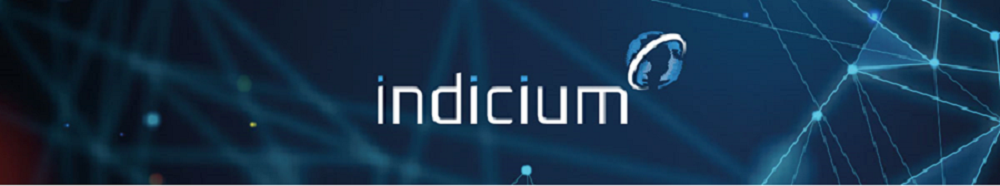


# Indicium Data Scientist Challenge - Behavior of the urban traffic of the city of Sao Paulo in Brazil



<a id='introduction'></a>

# Introduction  

This project has the objective of analyzing a dataset containing information from urban traffic of the city of São Paulo in Brazil and walk through the process of build a machine learning model to predict the traffic slowness percentage.

The original dataset can be accessed via the link below  
https://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil

The processes contained in this document consist of:

1. Exploratory Data Analysis
2. Feature Engineering
3. Modeling
4. Deploy



<a id = index></a>

# Index


- [Title](#title)

- [Introduction](#introduction)

- [Index](#index)  

1. [Methodology and Requirements](#1)

2. [Exploratory Data Analysis (EDA)](#2)  
  
3. [Feature  Engineering](#3)  

4. [Modelling](#4)  
    4.1 [Regression Models](#4.1)  
    &emsp;4.1.1 [Linear Regression](#4.1.1)  
    &emsp;4.1.2 [Logistic Regression](#4.1.2)  
    &emsp;4.1.3 [Polynomial Regression](#4.1.3)  
    &emsp;4.1.4 [Ridge Regression](#4.1.4)  
    4.2 [Preparing the data for modelling](#4.2)  
    &emsp;4.2.1 [Organizing and separating data for modelling](#4.2.1)  
    &emsp;4.2.2 [Training The models](#4.2.2)  
    &emsp;&emsp;4.2.2.1 [Linear Regression Code](#4.2.2.1)  
    &emsp;&emsp;4.2.2.2 [Polynomial Regression Code](#4.2.2.2)  
    &emsp;&emsp;4.2.2.3 [Ridge Regression Code](#4.2.2.3)  
    &emsp;&emsp;4.2.2.4 [XGBoost Regression Code](#4.2.2.4)  
    &emsp;4.2.3 [Linear Regression](#4.2.3)  
    4.3 [Tuning and building the final model](#4.3)  
    4.4 [Building the whole project on the kedro framework](#4.4)  

5. [Deployment](#5)

6. [Conclusões e Sugestões](#conclusoes-e-sugestoes)  
    6.1 [Estrutura de Dados](#estrutura-de-dados)  
    6.2 [Sugestões para o Negócio](#sugestoes-para-o-negocio)  

- [Apêndice](#apendice)  

<a id = 1></a>

# 1.Methodology and Requirements


[(Back to top)](#index)


All documentation and the initial steps of EDA, feature engineering and modeling are written on this jupyter notebook. The final code is structured in a github repository and is built using kedro framework.


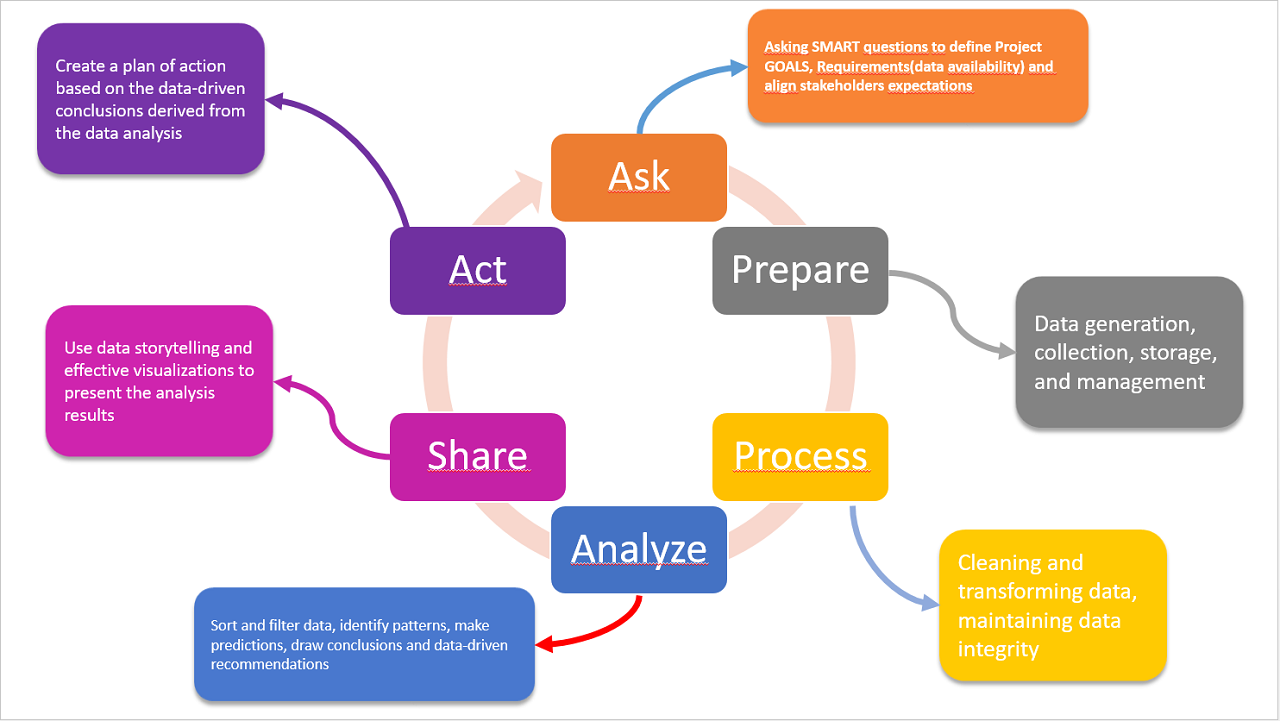

<p  style="text-align: center;">  <em>Figura-1: Framework de análise de dados </em>  </p>


<a id = 2></a>

# 2.Exploratory Data Analysis


[(Back to top)](#index)


Structuring a good solution begins with a good understanding and exploration of all elements avaliable and its constraints. Knowing  your problem as deep as possible can help making the best decisions and avoid paliative measures and incomplete solutions.

Exploring the data involves listing all data avaliable and its integrity and assessing the relevance of each data in the solution's construction

Therefore, the first step is to verify the data integrity, checking if all data was correctly loaded into the work environment, verifying missing and/or corrupted data, confirming all data types are correct and so on.

Opening the csv file, the first issue encountered is the separators used. Traditionally, the column separator is a comma(,) and the decimal separator is a dot(.). In this file, the column separator is a semicolon(;) and the decimal separator is a dot(.). This could result in data corruption but it will be treated directly into the kedro catalog configuration so the data load function will work without problems.

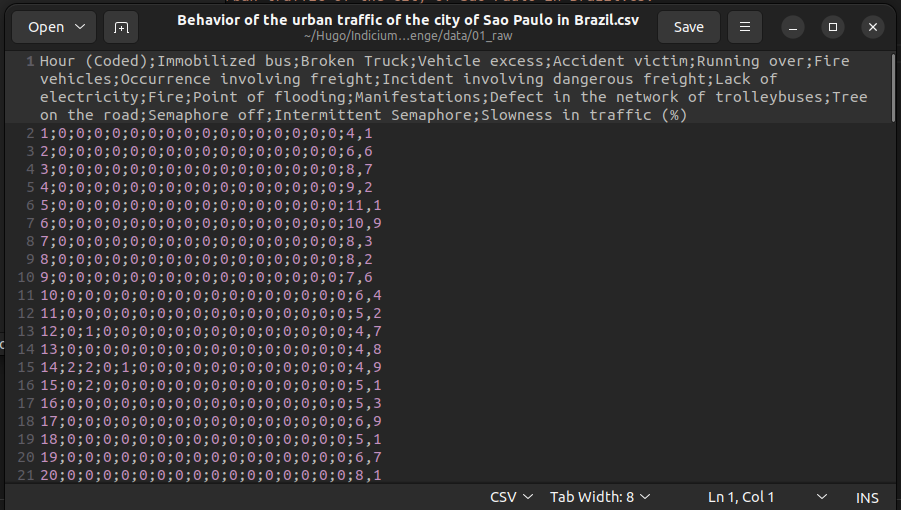

<p  style="text-align: center;">  <em>Figure-1: Raw CSV file </em>  </p>


With the data poperly configured on kedro catalog, the next step is to load the data into the jupyter notebook and verify its integrity:

In [1]:
%reload_kedro

# basic  imports used in data manipulation and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Imports related to the interactive plots in the EDA section
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, ColorBar, LinearColorMapper
import bokeh.io
from bokeh.palettes import Plasma10


# Imports related to the separation of data into train and test parts
from sklearn.model_selection import train_test_split

# Imports of the Regression modelling functions
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import xgboost as xgb

# Import of the main metric for the models performance
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

# Import related to the tuning of the XGBoost model
from sklearn.model_selection import GridSearchCV

bokeh.io.output_notebook()

                    INFO     Resolved project path as: /home/hbeltrao/Hugo/Indicium/LightHouse/Data __init__.py:132
                             Science Track/kedro_tutorial/kedro_project_1/lighthouse-ds-challenge.                 
                             To set a different path, run '%reload_kedro <project_root>'                           

[02/13/23 11:12:18] INFO     Kedro project Lighthouse_ds_challenge                                  __init__.py:101

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:102
                             'pipelines'                                                                           

[02/13/23 11:12:19] WARNING  /home/hbeltrao/Hugo/Indicium/LightHouse/Data Science                   ]8;id=238428;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=759740;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             Track/kedro_tutorial/kedro_project_1/lighthouse-ds-challenge/.venv/lib                
                             /python3.8/site-packages/bokeh/core/property/primitive.py:37:                         
                             DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.                  
                             (Deprecated NumPy 1.24)                                                               
                               bokeh_bool_types = (bool, np.bool8)                                                 
                                                                                                                   

Loading BokehJS ...

In [2]:
# verifying if all files were loaded into the framework
catalog.list()

[
    'raw_traffic_data',
    'train_features',
    'train_targets',
    'test_features',
    'test_targets',
    'fitted_regressor',
    'parameters',
    'params:features',
    'params:target'
]

In [3]:
# Loading our dataset as raw data to start exploring
raw_traffic_data = catalog.load('raw_traffic_data')
raw_traffic_data.reset_index(inplace=True)

raw_traffic_data.head()

                    INFO     Loading data from 'raw_traffic_data' (CSVDataSet)...               data_catalog.py:343

,index,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


In [4]:
# Checking if all data was loaded corrected by counting the total rows and columns and comparing with the original data
raw_traffic_data.shape

(135, 19)

In [5]:
# Checking all column types and null values
raw_traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   index                                  135 non-null    int64  
 1   Hour (Coded)                           135 non-null    int64  
 2   Immobilized bus                        135 non-null    int64  
 3   Broken Truck                           135 non-null    int64  
 4   Vehicle excess                         135 non-null    int64  
 5   Accident victim                        135 non-null    int64  
 6   Running over                           135 non-null    int64  
 7   Fire vehicles                          135 non-null    int64  
 8   Occurrence involving freight           135 non-null    int64  
 9   Incident involving dangerous freight   135 non-null    int64  
 10  Lack of electricity                    135 non-null    int64  
 11  Fire  

In [6]:
# Printing the percentage of null values of each column
raw_traffic_data.isnull().sum()*100/len(raw_traffic_data)

index                                    0.0
Hour (Coded)                             0.0
Immobilized bus                          0.0
Broken Truck                             0.0
Vehicle excess                           0.0
Accident victim                          0.0
Running over                             0.0
Fire vehicles                            0.0
Occurrence involving freight             0.0
Incident involving dangerous freight     0.0
Lack of electricity                      0.0
Fire                                     0.0
Point of flooding                        0.0
Manifestations                           0.0
Defect in the network of trolleybuses    0.0
Tree on the road                         0.0
Semaphore off                            0.0
Intermittent Semaphore                   0.0
Slowness in traffic (%)                  0.0
dtype: float64

In [7]:
# Checking the distribution of the data in each column
raw_traffic_data.describe()

,index,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
count,135.000000,135.00000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,67.000000,14.00000,0.340741,0.874074,0.029630,0.422222,0.118519,0.007407,0.007407,0.007407,0.118519,0.007407,0.118519,0.051852,0.229630,0.044444,0.125926,0.014815,10.051852
std,39.115214,7.81789,0.659749,1.102437,0.170195,0.696116,0.346665,0.086066,0.086066,0.086066,0.504485,0.086066,0.712907,0.222554,0.818998,0.206848,0.464077,0.121261,4.363243
min,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000
25%,33.500000,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.400000
50%,67.000000,14.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,100.500000,21.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.850000
max,134.000000,27.00000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,7.000000,1.000000,8.000000,1.000000,4.000000,1.000000,23.400000


The first analysis round showed that all data was loaded correctly (all rows and columns), is numeric and have no null values.

One possible issue is in the "Hour (Coded)" column, wich have values from 1 to 27 but a day only have 24 unique hours. Since the column is tagged as coded but no information about how it was efectivelly coded is available, those values cannot be counted as errors.

Next, will be shown the unique values distribution of each column data:

In [8]:
# Checking the ammount of unique values in each column
for col in raw_traffic_data.columns.values:
    print(len(raw_traffic_data[col].unique()))


135
27
4
6
2
4
3
2
2
2
5
2
4
2
5
2
4
2
83


Since all data is numeric and no other information was given for the columns metadata, it is not possible to interpret any column as purely categorical, counting some specific event or represent some mathematical or physical greatness. Some columns are booleans but coding them as booleans does not improve the modelling process, so they will be kept as numeric.


Assuming the data is ordered cronologically by indexes, plotting a line will show the behavior of the traffic slowness on a time passage base and might highlight some sazonal behavior:

In [9]:
# convertendo o dataset para ser plotado com o bokeh

data_source = ColumnDataSource(raw_traffic_data)

# Criando e configurando a figura a ser plotada
p = figure(title="Behavior of traffic in São Paulo Brazil between 14/12/2009 and 18/12/2009", x_axis_label="Period", 
           y_axis_label="Slowness in traffic (%)", width=990, height=400, tools='',
           toolbar_location=None)


#  Ajustando eixos e título
p.title.align = 'center'
p.title.text_font_size='12pt'
#p.xaxis.ticker.desired_num_ticks = len(average_ticket_monthly_per_customer_full['date'].unique())
#p.yaxis.formatter=NumeralTickFormatter(format="($ 0.00 a)")
#p.xaxis.major_label_orientation = "vertical"
#p.border_fill_color = "whitesmoke"
#p.min_border_left = 80



# Criando uma lineplot  
a=p.line(x='index', y='Slowness in traffic (%)', source = data_source,
        color= 'blue', line_width=2, legend_label="Slowness in Traffic")


# Adicionando a ferramenta de hovertool ao gráfico

p.add_tools(HoverTool(
    tooltips=[
        ( 'index',   '$index'),
        ( 'Hour Coded',   '@{Hour (Coded)}'),
        ( 'Slowness in traffic (%)', '@{Slowness in traffic (%)}{0.0}')
    ],

    mode='vline',
    renderers=[a]
))



# Adicionando a legenda fora da área do gráfico
p.add_layout(p.legend[0], 'below')

show(p)

From the time series, the behavior of the traffic slowness is quite related to the *Hour (Coded)* column and some spikes can bem identified.

another way to view this relationship is to plot the average slowness in each hour:

In [10]:
# Getting the average slowness per hour coded, to be plotted in a bar chart
data = raw_traffic_data.groupby(['Hour (Coded)'])['Slowness in traffic (%)'].mean().to_frame()

In [11]:
data_source = ColumnDataSource(data)

p = figure(title="Average Slowness per hour coded", x_axis_label="Hour (Coded)", 
           y_axis_label="Slowness in traffic (%)", width=990, height=400, tools='',
           toolbar_location=None)


#  Ajustando eixos e título
p.title.align = 'center'
p.title.text_font_size='12pt'
#p.xaxis.ticker.desired_num_ticks = len(average_ticket_monthly_per_customer_full['date'].unique())
#p.yaxis.formatter=NumeralTickFormatter(format="($ 0.00 a)")
#p.xaxis.major_label_orientation = "vertical"
#p.border_fill_color = "whitesmoke"
#p.min_border_left = 80



a=p.vbar(x='Hour (Coded)', top='Slowness in traffic (%)', source = data_source,
                color= 'blue', width=0.5, fill_alpha=0.5, legend_label="Average Slowness per hour")


# Adicionando a ferramenta de hovertool ao gráfico

p.add_tools(HoverTool(
    tooltips=[
        ( 'Hour Coded',   '@{Hour (Coded)}'),
        ( 'Average Slowness (%)', '@{Slowness in traffic (%)}{0.0}')
    ],

    mode='vline',
    renderers=[a]
))



# Adicionando a legenda fora da área do gráfico
p.add_layout(p.legend[0], 'below')

show(p)

With this relationship explored, the next step is to explore the rest of the features present in the dataset.

This analysis will be performed in the feature engineering section, in order to select the most fit features to be used in the modeling phase.

<a id = 3></a>

# 3.Feature Engineering


[(Back to top)](#index)


It would be advised to perform some level of analysis in all features, to verify patterns and peculiarities. Since there are 17 features, a good way to optimize this work is to verify the correlation between each feature and the target, in this case *slowness in traffic (%)*.

An quick way to visualize the correlation between features is to plot the correlation matrix as a heatmap, as shown below:

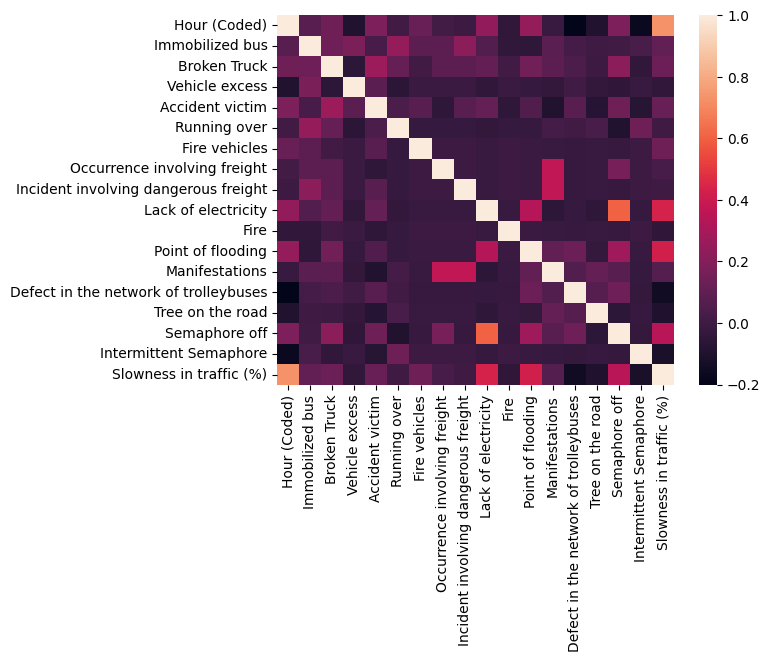

In [12]:
sns.heatmap(raw_traffic_data.drop(['index'], axis=1).corr())

Although a heatmap can help visualize the correlation between features, it can be inefficient to identify the most impactful features. A faster way to get this information is to extract only the correlation between all features and the target.
Below will be shown a list with this correlations and the most relevant ones will be separated to be analyzed and eventually used in the modelling phase:

In [13]:
correlation_matrix = raw_traffic_data.drop(['index'], axis=1).corr()
corr = correlation_matrix['Slowness in traffic (%)'].to_frame().reset_index(names='features').sort_values(by='Slowness in traffic (%)', ascending=False)
corr.drop(index=17, axis=0, inplace=True)
corr

,features,Slowness in traffic (%)
0,Hour (Coded),0.729962
9,Lack of electricity,0.436569
11,Point of flooding,0.420016
15,Semaphore off,0.347242
6,Fire vehicles,0.134103
2,Broken Truck,0.131998
4,Accident victim,0.121730
1,Immobilized bus,0.101143
12,Manifestations,0.066377
7,Occurrence involving freight,0.026791


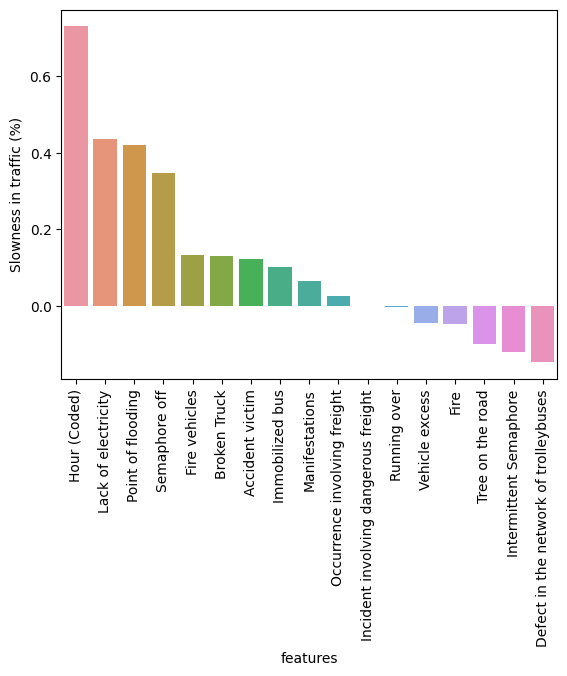

In [14]:
sns.barplot(data=corr, x='features', y='Slowness in traffic (%)')
plt.xticks(rotation=90)
plt.show()

The graphic shows four features with significant inpact to the slowness and five features that actually reduce slowness when present, although not very impactfully.

Before rule out the less impactfull features, it is good to verify the incidence rate of each feature

In [15]:
# Calculating the incidence rate of each feature

incidence_x_correlation = {}
for col in raw_traffic_data.drop(['index'], axis=1).columns.values:
    incidence_rate = round(sum(raw_traffic_data[col] > 0)/len(raw_traffic_data[col])*100 ,2)
    print(col, incidence_rate)
    incidence_x_correlation[col] = {}
    incidence_x_correlation[col]['incidence_rate'] = incidence_rate
    incidence_x_correlation[col]['slowness_in_traffic'] = corr[corr['features']==col]['Slowness in traffic (%)'].values

Hour (Coded) 100.0
Immobilized bus 25.93
Broken Truck 52.59
Vehicle excess 2.96
Accident victim 31.85
Running over 11.11
Fire vehicles 0.74
Occurrence involving freight 0.74
Incident involving dangerous freight 0.74
Lack of electricity 7.41
Fire 0.74
Point of flooding 4.44
Manifestations 5.19
Defect in the network of trolleybuses 14.81
Tree on the road 4.44
Semaphore off 9.63
Intermittent Semaphore 1.48
Slowness in traffic (%) 100.0


In [16]:
# Comparing the incidence_rate to the correlation index to verify possible dropable features 
incidence_x_correlation_df = pd.DataFrame(incidence_x_correlation)
_incidence_x_correlation_df = incidence_x_correlation_df.transpose().reset_index(names='feature')
_incidence_x_correlation_df.sort_values(by='slowness_in_traffic', ascending=False)

[02/13/23 11:12:20] WARNING  /home/hbeltrao/Hugo/Indicium/LightHouse/Data Science                   ]8;id=881670;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=577781;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             Track/kedro_tutorial/kedro_project_1/lighthouse-ds-challenge/.venv/lib                
                             /python3.8/site-packages/pandas/core/sorting.py:438:                                  
                             DeprecationWarning: The truth value of an empty array is ambiguous.                   
                             Returning False, but in future this will result in an error. Use                      
                             `array.size > 0` to check that an array is not empty.                                 
                               indexer = non_nan_idx[non_nans.argsort(kind=kind)]                                  
                                                                                                                   

,feature,incidence_rate,slowness_in_traffic
0,Hour (Coded),100.0,[0.7299622611542895]
9,Lack of electricity,7.41,[0.4365694933961246]
11,Point of flooding,4.44,[0.4200156746993659]
15,Semaphore off,9.63,[0.3472417166131551]
6,Fire vehicles,0.74,[0.13410263355364693]
2,Broken Truck,52.59,[0.1319979021813809]
4,Accident victim,31.85,[0.12173047795731425]
1,Immobilized bus,25.93,[0.10114325874482982]
12,Manifestations,5.19,[0.06637673323323363]
7,Occurrence involving freight,0.74,[0.026791085956930555]


From the incidence_rate x slowness_in_traffic, it is possible to identify some columns with both loow incidence rate and impact on the traffic slowness, so those features could be removed from the model with less risk of harming the model.

With this strategy, the features removed are: 



|                              feature | incidence_rate | slowness_in_traffic |
|-------------------------------------:|---------------:|--------------------:|
|                        Fire vehicles |           0.74 | 0.1341              |
|                       Manifestations |           5.19 | 0.0663              |
|         Occurrence involving freight |           0.74 | 0.0267              |
| Incident involving dangerous freight |           0.74 | 0.0009              |
|                         Running over |          11.11 | -0.0011             |
|                       Vehicle excess |           2.96 | -0.0452             |
|                                 Fire |           0.74 | -0.0467             |
|                     Tree on the road |           4.44 | -0.0984             |
|               Intermittent Semaphore |           1.48 | -0.1199             |


With this, the final feature list to be used in the modeling phase will be :

- Hour (Coded) 
- Immobilized bus 
- Broken Truck
- Accident victim 
- Lack of electricity
- Point of flooding
- Defect in the network of trolleybuses
- Semaphore off



<a id = 4></a>

# 4.Modelling


[(Back to top)](#index)


With all data analyzed and the proper features selectec. It is time to create a preditcion model to effectivelly predict the slowness in traffic in São Paulo city.

Since the problem is resumed to estimate a numeric value based on other numeric values, a regression model might be the best fit to perform this task.

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable and one or more independent variables.

<a id = 4.1></a>
## 4.1. Regression Models

There are several types of regression techniques, suited to different data nature. To choose the most suited to our dataset, a brief introduction to some regression models is appreciated.


<a id = 4.1.1></a>
### 4.1.1. Linear Regression

Linear Regression assume a linear relation between the features and the target variable. The model consists in a simple line of equation: 
$$
Y_i = m*X_i + C + e_i
$$
Where:

Y = variable to be predicted  
X = feature value  
C = intercept  
m = slope of the curve  
e = error function  

It can be used with one or more independent variables (features). Due to its linear nature, evidently this  type of regression is not suited to be used to model non-linear relationships.


<a id = 4.1.2></a>
### 4.1.2. Logistic Regression

Logistic Regression is a technique used to predict discreet values (i.e. categorical or boolean). In essence, it models a Sigmoid curve in wich the target value will be setted to 0 or 1 depending on its value and the threshold value:

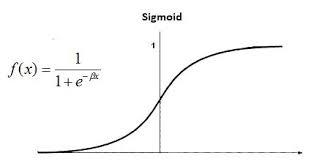

The main downside of this technique is  it is limited to discreet features and target. Another limitation is that it assume linearity between the target and the features.



<a id = 4.1.3></a>
### 4.1.3. Polynomial Regression

Is similar to the Linear Regression, but the resulting line is curved and better represents non-linear relationships:

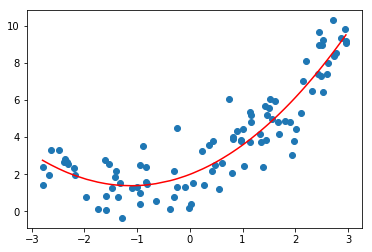


<a id = 4.1.4></a>
### 4.1.4 Ridge Regression

Is a technique used when there is multicolinearity (high correlation) between the features. It intentionally bias the regression estimates by applying a penalty function.


<a id = 4.2></a>
## 4.2. Preparing the data for modelling

with all analysis and transformations done and all important features selected, it is time to structure the final dataset to be modelled.

This way, the original dataset will be sliced to contain only the selected features and then will be separated into training and test parts.

From then, the model will be fitted based on the training dataset and after that, validated with the test dataset.

<a id = 4.2.1></a>
### 4.2.1. Organizing and separating data for modelling

Below is the code to filter the selected features and split the dataset into train and test parts:


In [17]:
# Listing all features. the target column can be ommited here because it will be put into a separated variable.
features = [ 'Hour (Coded)', 'Immobilized bus', 'Broken Truck', 'Accident victim', 'Lack of electricity',
            'Point of flooding', 'Defect in the network of trolleybuses', 'Semaphore off']

# Creating the dataset with all features data
feature_selected_traffic_data = raw_traffic_data[features]

# Dataset containing the data to be predicted
target_data = raw_traffic_data['Slowness in traffic (%)']

In [18]:
# Separating both datasets into train and test parts 

X_train, X_test, y_train, y_test = train_test_split(feature_selected_traffic_data, target_data, test_size=0.2, random_state=33)

<a id = 4.2.2></a>
### 4.2.2. Training and comparing some models

A practical way to choose the best modelling technique for this problem is to test and verify the precision of some techniques.

In this session, some models will be trained to be compared with each other.

The models that will be trained are Linear, Polynomial, Ridge and a XGBoost regressor wich is a gradient boost regressor that usually is very efficient in general purpose problems.

The metric used to compare the models is a combination of Mean Absolute Error (MAE) and Rooted Mean Squared Error (RMSE):

$$
RMSE = \sqrt{\frac{1}{n}\sum_{j=1}^{n}(y_j - \hat{y}_j)²}
$$
  
$$
MAE = \frac{1}{n}\sum_{j=1}^{n}\vert{y_j} - {\hat{y_j}}\vert
$$

The RMSE metric is good to penalyze bigger erros (such as outliers) and a combination with the MAE can help diagnose the excessive presence of those outliers.

<a id = 4.2.2.1></a>
#### 4.2.2.1. Linear Regression Code

In [19]:
# Declaring the regressor element
linear_regressor = LinearRegression()

# Fitting the regressor with the train data
fitted_lin_reg = linear_regressor.fit(X_train, y_train)

# Calculating the score for the train and test datasets
lin_reg_score_train = fitted_lin_reg.score(X_train, y_train)
lin_reg_score_test = fitted_lin_reg.score(X_test, y_test)
print("Linear Regression Train Score:", lin_reg_score_train,"\n", "Linear Regression Test Score:", lin_reg_score_test)

Linear Regression Train Score: 0.6716778409881007 
 Linear Regression Test Score: 0.4850416449090481


In [31]:
linear_predict = fitted_lin_reg.predict(X_test)
rmse = np.sqrt(MSE(y_test, linear_predict))
mae = MAE(y_test, linear_predict)
print(rmse, "\n", mae)

2.629481732399216 
 2.0836367218565304


<a id = 4.2.2.2></a>
#### 4.2.2.2. Polynomial Regression Code

In [21]:
# Creating the polynomial features to be used to generate the polynomial curve and adjusting the datasets to the same format
poly = PolynomialFeatures(degree = 4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Fitting the model
polynomial_regressor = LinearRegression()
fitted_polynomial_regressor = polynomial_regressor.fit(X_train_poly, y_train)

# Calculating the score for the train and test datasets
poly_reg_score_train = fitted_polynomial_regressor.score(X_train_poly, y_train)
poly_reg_score_test = fitted_polynomial_regressor.score(X_test_poly, y_test)

In [22]:
print("Polynomial Regression Train Score:", poly_reg_score_train,"\n", "Polynomial Regression Test Score:", poly_reg_score_test)

Polynomial Regression Train Score: 0.9409161930936613 
 Polynomial Regression Test Score: -2205.9674638592974


In [32]:
poly_predict = fitted_polynomial_regressor.predict(X_test_poly)
rmse = np.sqrt(MSE(y_test, poly_predict))
mae = MAE(y_test, poly_predict)
print(rmse, "\n", mae)

172.14010712619387 
 72.80118255164638


<a id = 4.2.2.3></a>
#### 4.2.2.3. Ridge Regression Code

In [24]:
# Creating the Ridge classifier
ridge_regressor = Ridge(alpha=1.0)

# Fitting the model
fitted_ridge_regressor = ridge_regressor.fit(X_train, y_train)

# Calculating the scores
ridge_reg_score_train = fitted_ridge_regressor.score(X_train, y_train)
ridge_reg_score_test = fitted_ridge_regressor.score(X_test, y_test)
print("Ridge Regression Train Score:", ridge_reg_score_train,"\n", "Ridge Regression Test Score:", ridge_reg_score_test)

Ridge Regression Train Score: 0.6716331076194091 
 Ridge Regression Test Score: 0.4866007712119762


In [33]:
ridge_predict = fitted_ridge_regressor.predict(X_test)
rmse = np.sqrt(MSE(y_test, ridge_predict))
mae = MAE(y_test, ridge_predict)
print(rmse, "\n", mae)

2.6254981073808707 
 2.07638864425551


<a id = 4.2.2.4></a>
#### 4.2.2.4. XGBoost Regression Code

In [26]:
# Creating the xgboost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', seed=123)

fitted_xgb_regressor = xgb_regressor.fit(X_train, y_train)

xgb_predict = fitted_xgb_regressor.predict(X_test)
rmse = np.sqrt(MSE(y_test, xgb_predict))
mae = MAE(y_test, xgb_predict)
print(rmse, "\n", mae)

2.7547446307777044 
 2.208144795453107


<a id = 4.3></a>
## 4.3. Choosing and building the final model

Judging all models tested before, although the linear, ridge and xgboost models presented similar root mean squared errors (RMSE), there are some important characteristics that need to be accounted for choosing the final model. First, linear models assume that all relationships betweeen featuires and target are linear, wich is not necessarily true. It is also very simple and usually have a broad error band.
The Ridge regression can help with overfitting but it also inputs bias to the result wich can milead the result.  
The XGBoost model is based on decision tree, wich is more precise than linear regression and it is still very fast. In this scenario with limited data samples, the XGBoost model could be overfitted, but with long usage, the dataset could grow enough to benefit this technique. Also XGBoost still have some parameter tuning that can be made in order to improve its performance.

With that in mind, the final model wi be a tuned version of the XGBoost model, that will be adjusted in the following steps:


In [27]:
# Logic to test and identify the best parameters for the regressor
param_grid = {"max_depth":    [2, 4, 6],
              "n_estimators": [100, 300, 500],
              "learning_rate": [0.01, 0.015]}

search = GridSearchCV(xgb_regressor, param_grid, cv=5).fit(X_train, y_train)

In [28]:
# Input the best parameters into the regressor and fit it
tuned_xgb_regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"])

tuned_xgb_regressor.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [29]:
type(search.best_params_)

<class 'dict'>

In [30]:
# Calculating the RMSE of the tuned xgb model
tuned_xgb_predict = tuned_xgb_regressor.predict(X_test)
rmse = np.sqrt(MSE(y_test, tuned_xgb_predict))
mae = MAE(y_test, tuned_xgb_predict)
print(rmse, "\n", mae)

2.3593315106301738 
 2.0041507049843124


The final model have a RMSE of 2.3593, wich is 11 % lower than the second best model(ridge model).

With all preparations and analysis done, it is time to structure the final model into the kedro framework and prepare the deployment strategy.


<a id = 4.4></a>
## 4.4. Building the whole project on the kedro framework

The last step to productize the machine learning model is to build it on the kedro framework, in order to facilitate maintenance, documentation and deployment.

All files and documentation referred to the kedro implementation of this project are on the project repository (accessed via link below)

< add link to de github repository>

Instructions on how to clone and run the project are on the repository README.md file.

<a id = 5></a>
# 5. Deployment

[(Back to top)](#index)

<a id = 6></a>

# 6.Conclusões e Sugestões


[(Back to top)](#index)


Sumarizando as principais informações deste relatório, tem-se duas linhas de ação que merecem atenção da Northwind, uma relacionada à estrutura dos dados da empresa e outra relacionada ao negócio em si.


![Figure-3_Open_Orders_Panel-2.png](attachment:Figure-3_Open_Orders_Panel-2.png)

<p  style="text-align: center;"><em>Figura-3: Proposta de painel de acompanhamento de ordens em aberto</em></p>


<a id = apendice></a>

# Apêndice


[(Back to top)](#indice)

Neste apêndice estão listadas todas as SQL queries usadas no relatório, cada query está linkada à sessão a qual foi usada:
  
___

[3-1_customers_by_country.sql](#distribuicao-de-clientes)

```SQL

SELECT country, COUNT(customer_id) AS tot_customers,
    ROUND(100*COUNT(*) / CAST( SUM(count(*)) OVER () AS FLOAT), 2) AS 'customer_share(%)'
FROM customers
GROUP BY country
ORDER BY tot_customers DESC;

```

___